In [1]:
import pandas as pd
df = pd.read_json('news_dataset.json',lines=True)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [2]:
df = df[['category','headline']]

In [6]:
print(df.head(),'\n\n')
print(df.info(),'\n\n')
print(df.shape,'\n\n')
print(df['category'].value_counts())
for i in range(15):
    print(df['headline'][i], df['category'][0])

        category                                           headline
0          CRIME  There Were 2 Mass Shootings In Texas Last Week...
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags... 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 2 columns):
category    200853 non-null object
headline    200853 non-null object
dtypes: object(2)
memory usage: 3.1+ MB
None 


(200853, 2) 


POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS   

In [27]:
print(df.category.unique())
l = []
for i in df.category.unique():
    l.append(i)
print(l)    

['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']
['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS', 'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES', 'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION', 'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS', 'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY', 'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT', 'CULTURE & ARTS']


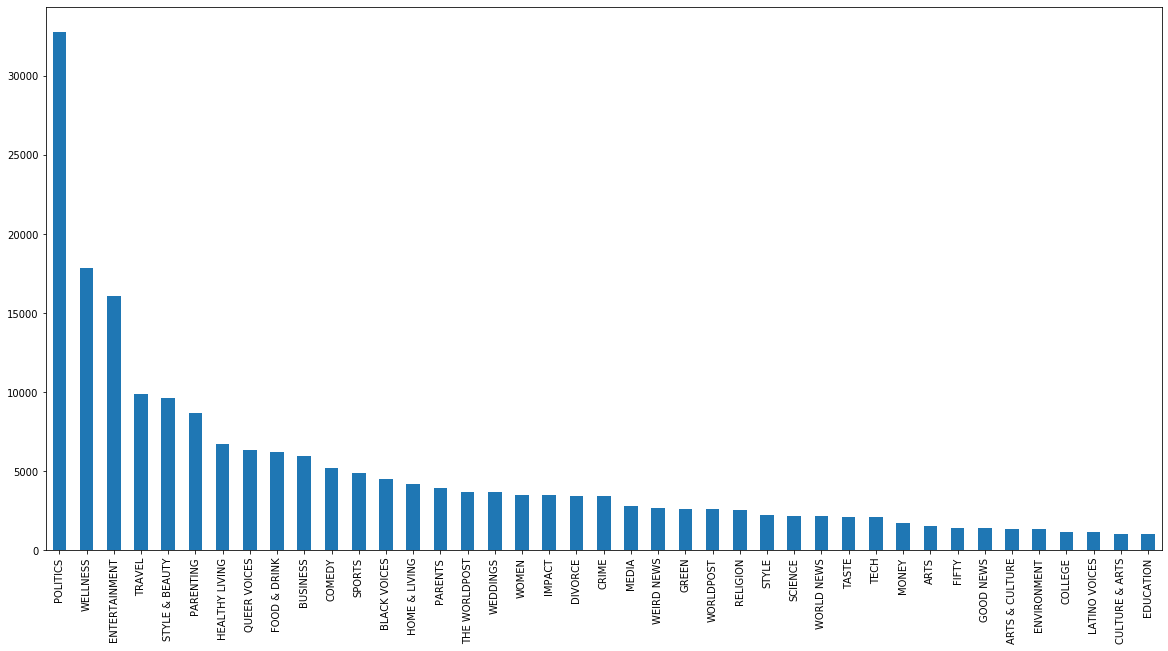

In [4]:
df.category.value_counts().plot.bar(figsize = (20,10))

In [5]:
df['category'].isna().sum()

0

In [29]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,category,headline
0,POLITICS,HUFFPOST HILL - Does Anyone Else Think Mike Pe...
1,ARTS & CULTURE,Bizarre Photos Capture The Unreality Of The 20...
2,ENTERTAINMENT,"Dave Chappelle Speaks Out About Comeback, Says..."
3,ARTS,Stage Door: The Judas Kiss
4,QUEER VOICES,Why Pride Still Tickles In 2017


In [30]:
X = df.headline
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

In [31]:
# Naive bayes vs Multinomial naive bayes
# For n dimensional data with k classes, in naive bayes, we have to assume some probability distribution for every
# dimension,class pair ; but in mnb we simply assume multinomial distribution for all the pairs.
from sklearn.naive_bayes import MultinomialNB

# Pipelining - Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit 
# and transform methods and the final estimator only needs to implement fit.
# making vectorizer => transformer => classifier 
from sklearn.pipeline import Pipeline

# tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended 
# to reflect how important a word is to a document in a collection or corpus
# TF - Term frequency(t,a) = no of occurrences of t in abstract(a) / no of words in abstract(a)
# IDF - inverse document frequency = log(no of documents/no of documents containing word t)
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.metrics import confusion_matrix
my_tags = ['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS'
           , 'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 
           'QUEER VOICES', 'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 
           'TECH', 'RELIGION', 'SCIENCE', 'LATINO VOICES', 'EDUCATION',
           'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 
           'TASTE', 'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 
           'WORLDPOST', 'FIFTY', 'ARTS', 'WELLNESS', 'PARENTING', 
           'HOME & LIVING', 'STYLE & BEAUTY', 'DIVORCE', 'WEDDINGS', 
           'FOOD & DRINK', 'MONEY', 'ENVIRONMENT', 'CULTURE & ARTS']

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.3999153618281845
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


/home/err_pv/anaconda3/envs/deep_learning/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

         CRIME       0.00      0.00      0.00       291
 ENTERTAINMENT       0.00      0.00      0.00       259
    WORLD NEWS       0.92      0.01      0.02       889
        IMPACT       0.79      0.05      0.09      1228
      POLITICS       0.00      0.00      0.00       234
    WEIRD NEWS       0.79      0.02      0.04      1045
  BLACK VOICES       0.92      0.05      0.10       670
         WOMEN       0.00      0.00      0.00       216
        COMEDY       0.97      0.10      0.17       666
  QUEER VOICES       0.00      0.00      0.00       190
        SPORTS       0.43      0.76      0.55      3175
      BUSINESS       1.00      0.00      0.01       250
        TRAVEL       0.00      0.00      0.00       286
         MEDIA       0.74      0.45      0.56      1186
          TECH       0.00      0.00      0.00       284
      RELIGION       1.00      0.00      0.00       535
       SCIENCE       0.67      0.00      0.00  

In [36]:
X_test1 = 'Chrome Web Store - Themes'
df1 = pd.read_csv("1.csv")
df1
# y_pred_f = nb.predict()

,headline
0,Chrome Web Store - Themes


In [38]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words("english"))
# print(stop_words,len(stop_words))# 179 words
# print("\n\n")
ps = PorterStemmer()

for i in range(len(df1)):
    example_text = df1.iloc[i,0]
    words = word_tokenize(example_text)
    filtered_sentence = []
    for w in words:
        w = w.lower()
        w = ps.stem(w)
        if w not in stop_words and w not in filtered_sentence:
            filtered_sentence.append(w)
    print(filtered_sentence,"\n\n")    
    df1.iloc[i,0] = filtered_sentence
    print(i)

['chrome', 'web', 'store', '-', 'theme'] 


0


In [39]:
for i in range(len(df1)):
    l = ''
    for j in df1.iloc[i,0]:
        # print(j)
        l+=j
        l+=' '
    df1.iloc[i,0] = l   
df1.head()
df1

,headline
0,chrome web store - theme


In [40]:
df1['headline'].apply(lambda x: len(x.split(' '))).sum()

6

In [42]:
x_test_final = df1['headline']
print(x_test_final)

0    chrome web store - theme 
Name: headline, dtype: object


In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
# my_tags = ['Non-Alcohol', 'Alcohol', 'Autonomous Vehicles', 'Non-Autonomous Vehicles']

# from sklearn.metrics import classification_report

y_pred_final = nb.predict(x_test_final)
print(x_test_final,y_pred_final)


0    chrome web store - theme 
Name: headline, dtype: object ['ENTERTAINMENT']
